In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

df = pd.read_csv('HR_comma_sep.csv')

In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
def satisfaction_according_to_dept(df):
    a = [1,2,3,4,5,6,7,8,9,10]
    departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
    plt.bar(a,df.groupby('sales').mean()['satisfaction_level'],align = 'center',color = '#1E92E3')
    plt.xticks(a ,departments ,rotation = 90)
    plt.ylabel('\nSatisfaction')
    plt.title('Satisfaction according to Department\n')
    plt.show()
    
def avgworkinghours(df):
    a = [1,2,3,4,5,6,7,8,9,10]
    departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
    plt.bar(a,df.groupby('sales').mean()['average_montly_hours'],align = 'center',color = '#1E92E3')
    plt.xticks(a ,departments ,rotation = 90)
    plt.ylabel('\nMonthly Working Hours')
    plt.title('Average Monthly Working Hours according to Department\n')
    plt.show() 
    
def peoplewholeft(df):
    a = [1,2,3,4,5,6,7,8,9,10]
    departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
    leftnumber = []
    for i in departments:
        leftnumber.append((float(len(df.loc[(df.sales == i) & (df.left == 1),'left']))/float(len(df[(df.sales == i)])))*100)
    plt.bar(a,leftnumber,align = 'center',color = '#1E92E3')
    plt.xticks(a ,departments ,rotation = 90)
    plt.ylabel('\n% of People who left')
    plt.title('Number of People who left according to department\n')
    plt.show()
    
def promotion(df):
    a = [1,2,3,4,5,6,7,8,9,10]
    promotion = []
    departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
    for i in departments:
        promotion.append((float(len(df.loc[(df.sales == i) & (df.promotion_last_5years == 1)]))/float(len(df.loc[df.sales == i])) * 100))
    plt.bar(a,promotion,align = 'center',color = '#1E92E3')
    plt.xticks(a ,departments ,rotation = 90)
    plt.ylabel('\n% of People')
    plt.title('Number of People who got promotion in the last 5 years\n')
    plt.show()

def noofemployees(df):
    a= [1,2,3,4,5,6,7,8,9,10]
    employee = []
    departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
    for i in departments:
        employee.append((float(len(df.loc[df.sales == i]))/float(len(df)) * 100))
    plt.bar(a,employee,align = 'center',color = '#1E92E3')
    plt.xticks(a ,departments ,rotation = 90)
    plt.ylabel('\n% of People')
    plt.title('Number of People according to department\n')
    plt.show()    
    
def salary(df):
    departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
    lowsalary,mediumsalary,highsalary = [], [], []
    for i in departments:
        lowsalary.append((float(len(df.loc[(df.sales == i) & (df.salary == 'low')]))/float(len(df[df.sales == i])) * 100))
        mediumsalary.append((float(len(df.loc[(df.sales == i) & (df.salary == 'medium')]))/float(len(df[df.sales == i])) * 100))
        highsalary.append((float(len(df.loc[(df.sales == i) & (df.salary == 'high')]))/float(len(df[df.sales == i])) * 100))
    n = [1,3,5,7,9,11,13,15,17,19]
    width = 0.4
    plt.figure(figsize=(12,3))
    plt.bar([i-width for i in n], lowsalary, width, color = '#1E92E3',label = 'Low Salary')
    plt.bar(n,mediumsalary, width,color = '#E31E60',label = 'Low Salary')
    plt.bar([i+width for i in n],highsalary, width, color = '#F2EF43',label = ' Salary')
    plt.xticks(n ,departments ,rotation = 90)
    plt.ylabel('\nSalary')
    plt.title('\nSalary of Employees according to Department')
    plt.show()
    
def accident(df):
    a = [1,2,3,4,5,6,7,8,9,10]
    promotion = []
    departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
    for i in departments:
        promotion.append((float(len(df.loc[(df.sales == i) & (df.Work_accident == 1)]))/float(len(df.loc[df.sales == i])) * 100))
    plt.bar(a,promotion,align = 'center',color = '#1E92E3')
    plt.xticks(a ,departments ,rotation = 90)
    plt.ylabel('\n% of People')
    plt.title('Number of People who were involved in work accidents\n')
    plt.show()
      
def predictleave(df):
    df.salary = preprocessing.LabelEncoder().fit_transform(df.salary)
    df.sales = preprocessing.LabelEncoder().fit_transform(df.sales)
    X = df.drop(['left','last_evaluation'],axis=1)
    y = df['left']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.60, random_state = 42)
    classifiers = [['DecisionTree :',DecisionTreeClassifier()], ['RandomForest :',RandomForestClassifier()], ['Naive Bayes :', GaussianNB()], ['KNeighbours :', KNeighborsClassifier(n_neighbors = 2)], ['SVM :', SVC()], ['Neural Network :', MLPClassifier()]]
    for name,classifier in classifiers:
        classifier = classifier
        classifier.fit(X_train, y_train)
        print name,classifier.score(X_test, y_test)
        
def features_importance(df):
    df.salary = preprocessing.LabelEncoder().fit_transform(df.salary)
    df.sales = preprocessing.LabelEncoder().fit_transform(df.sales)
    X = df.drop(['left','last_evaluation'],axis=1)
    y = df['left']
    feature_names = X.columns
    rf =  RandomForestRegressor()
    rf.fit(X, y)
    print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature_names), reverse=True)
    

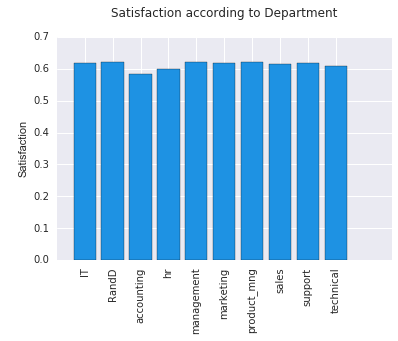

In [16]:
satisfaction_according_to_dept(df)

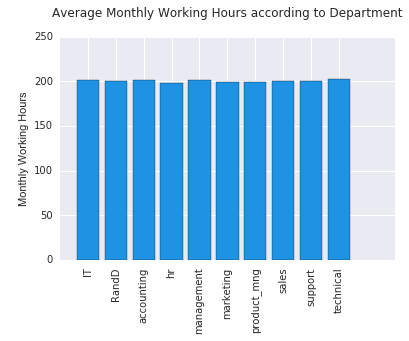

In [5]:
avgworkinghours(df)


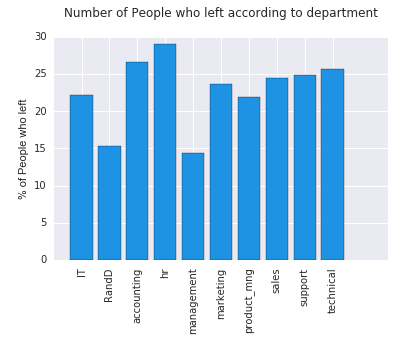

In [6]:
peoplewholeft(df)

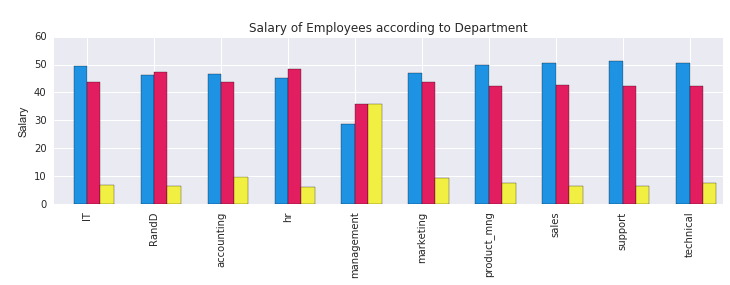

In [7]:
salary(df)

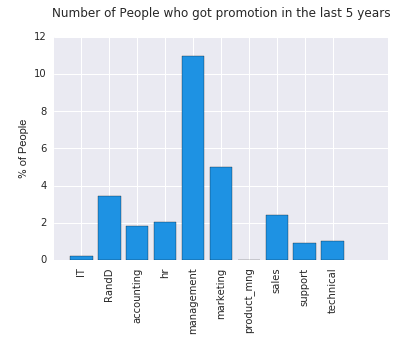

In [8]:
promotion(df)

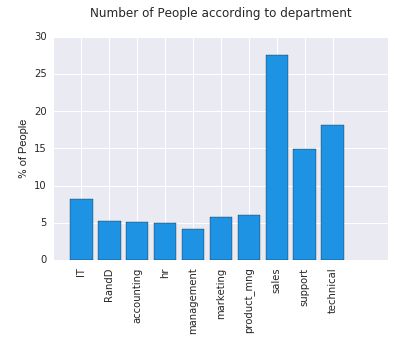

In [9]:
noofemployees(df)

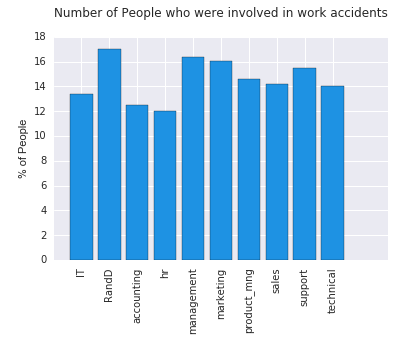

In [10]:
accident(df)

In [17]:
predictleave(df)

DecisionTree : 0.969777777778
RandomForest : 0.979111111111
Naive Bayes : 0.798
KNeighbours : 0.927888888889
SVM : 0.938666666667
Neural Network : 0.770777777778


#### As we can see RandomForest classifier gives the highest accuracy of 97.9%


In [14]:
features_importance(df)

[(0.5258, 'satisfaction_level'), (0.1684, 'time_spend_company'), (0.161, 'average_montly_hours'), (0.1205, 'number_project'), (0.0151, 'sales'), (0.0063, 'salary'), (0.0027, 'Work_accident'), (0.0001, 'promotion_last_5years')]


#### The top three most important factors for a person to leave a company are satisfaction level,time spent at the company and average monthly hours the person devotes to the company.